## Edge Density

Measures of edge density for hex grid

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import osmnx as ox
import seaborn as sns
import matplotlib.pyplot as plt

Load in the hex grid (was created in QGIS)

In [4]:
dfhex = gpd.read_file("../input_data/hex_grid/hex_grid_200m_test_subset.shp").to_crs(epsg=32617)
dfhex = dfhex.set_index('id')

In [5]:
# get boundary for the OSM
boundary = dfhex.geometry.to_crs(epsg = 4326).unary_union

Selecting and downloading the OSM network graph using custom filters for selecting ways

In [6]:
filter_drive = ('["area"!~"yes"]'
            '["highway"!~"motor|trunk|foot|proposed|construction|abandoned|platform|raceway|foot|cycleway"]'
            '["service"!~"driveway|emergency_access|parking_aisle|drive-through"]'
            '["access"!~"private"]')
filter_walk = ('["area"!~"yes"]'
            '["highway"!~"motor|trunk|proposed|construction|abandoned|platform|raceway"]'
            '["foot"!~"no"]'
            '["footway"!~"sidewalk"]'
            '["service"!~"private|parking_aisle"]'
            '["access"!~"private"]')
G = ox.graph_from_polygon(boundary, custom_filter=filter_drive)
G = ox.project_graph(G)
# fig, ax = ox.plot_graph(G, node_size=30, node_color='#66cc66') # for plotting :)

In [8]:
edges_all = ox.graph_to_gdfs(G, nodes=False)
edges_all.head()

,access,bridge,geometry,highway,key,lanes,length,maxspeed,name,oneway,osmid,service,tunnel,u,v
0,NaN,NaN,LINESTRING (631596.0284645489 4835294.47400190...,secondary,0,4,50.721,NaN,Dundas Street East,False,446823312,NaN,NaN,281704451,27559798
1,NaN,NaN,LINESTRING (631596.0284645489 4835294.47400190...,secondary,0,4,49.596,NaN,Dundas Street East,False,633312117,NaN,NaN,281704451,27559788
2,NaN,NaN,LINESTRING (632387.1059842939 4835745.45373042...,residential,0,2,19.990,NaN,Oak Street,False,608164994,NaN,NaN,34678788,2056853232
3,NaN,NaN,LINESTRING (632387.1059842939 4835745.45373042...,residential,0,2,5.714,NaN,Oak Street,False,608164994,NaN,NaN,34678788,2056853230
4,NaN,NaN,LINESTRING (632387.1059842939 4835745.45373042...,residential,0,2,79.862,NaN,Oak Street,False,608164994,NaN,NaN,34678788,34678783


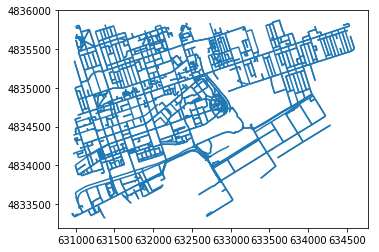

In [52]:
edges_all.plot()